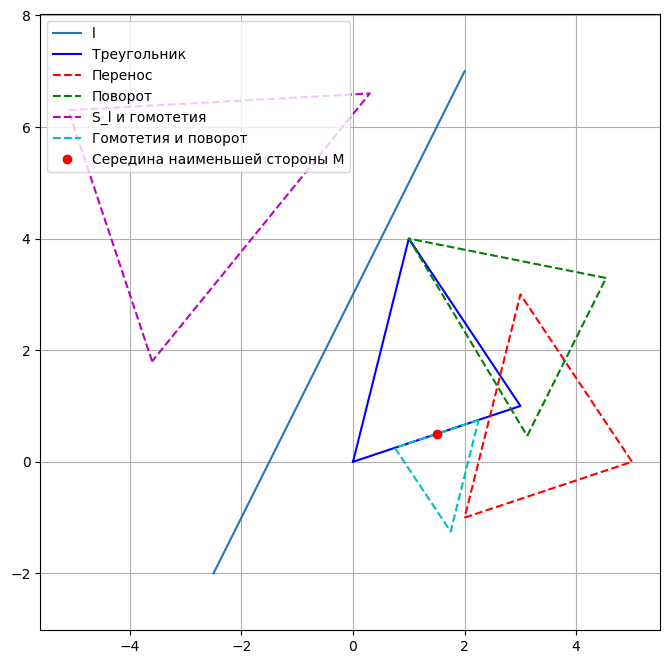

In [43]:
import math
from cProfile import label

import numpy as np
import matplotlib.pyplot as plt


def mid_of_shortest_side(vertices: np.ndarray) -> np.ndarray:
    x, y = vertices[0], vertices[1]

    def distance(i, j):
        return np.hypot(x[i] - x[j], y[i] - y[j])

    pairs = [(0, 1), (1, 2), (2, 0)]
    lengths = np.array([distance(i, j) for i, j in pairs])

    min_idx = np.argmin(lengths)
    i, j = pairs[min_idx]

    M = np.array([(x[i] + x[j]) / 2, (y[i] + y[j]) / 2])

    return M


def homogeneous_coordinates(coordinates_2d):
    return np.vstack([coordinates_2d, np.ones((1, coordinates_2d.shape[1]))])


def translation_matrix(a):
    return np.array([
        [1, 0, a[0]],
        [0, 1, a[1]],
        [0, 0, 1]
    ])


def rotation_matrix(phi_radians, center):
    cos_phi, sin_phi = math.cos(phi_radians), math.sin(phi_radians)
    cx, cy = center
    return np.array([
        [cos_phi, -sin_phi, - (cx * cos_phi - cy * sin_phi) + cx],
        [sin_phi, cos_phi, - (cx * sin_phi + cy * cos_phi) + cy],
        [0, 0, 1]
    ])


def reflection_matrix(l_x, l_y, b):
    l_norm_square = l_x ** 2 + l_y ** 2
    matrix = 1 / l_norm_square * np.array([[l_x ** 2 - l_y ** 2, 2 * l_x * l_y, -b * 2 * l_x * l_y],
                                           [2 * l_x * l_y, l_y ** 2 - l_x ** 2,
                                            b * (l_norm_square + l_x ** 2 - l_y ** 2)],
                                           [0, 0, 1]])
    return matrix


def homothety_matrix(k, center):
    cx, cy = center
    return np.array([
        [k, 0, (1 - k) * cx],
        [0, k, (1 - k) * cy],
        [0, 0, 1]
    ])


def apply_transformation(T, vertices):
    return T @ vertices


def plot_triangle(vertices, style='b-', label=None):
    vertices = np.hstack([vertices, vertices[:, :1]])
    plt.plot(vertices[0], vertices[1], style, label=label)


vertices = np.array([[0, 3, 1],
                     [0, 1, 4]])
homog_vertices = homogeneous_coordinates(vertices)

a = np.array([2, -1])
phi = math.pi / 4
center = [1, 4]
k = 1.5
m = 0.5
M = mid_of_shortest_side(vertices)

l = np.array([1, 2])
b = 3

t = np.linspace(-2.5, 2, 2)
x = t * l[0]
y = t * l[1] + b

T_a = translation_matrix(a)
R_C_phi = rotation_matrix(phi, center)
S_l = reflection_matrix(l[0], l[1], b)
H_O_k = homothety_matrix(k, [0, 0])
H_M_m = homothety_matrix(m, M)
R_M_pi = rotation_matrix(np.pi, M)

transformed_T_a = apply_transformation(T_a, homog_vertices)
transformed_R_C_phi = apply_transformation(R_C_phi, homog_vertices)
transformed_S_l_H_O_k = apply_transformation(H_O_k @ S_l, homog_vertices)
transformed_H_M_m_R_M_pi = apply_transformation(H_M_m @ R_M_pi, homog_vertices)

plt.figure(figsize=(8, 8))
plt.plot(x, y, label='l')
plot_triangle(homog_vertices, 'b-', 'Треугольник')
plot_triangle(transformed_T_a, 'r--', 'Перенос')
plot_triangle(transformed_R_C_phi, 'g--', 'Поворот')
plot_triangle(transformed_S_l_H_O_k, 'm--', 'S_l и гомотетия')
plot_triangle(transformed_H_M_m_R_M_pi, 'c--', 'Гомотетия и поворот')
plt.plot(M[0], M[1], 'ro', label='Середина наименьшей стороны M')

plt.legend()
plt.grid()
plt.axis('equal')
plt.show()